# Bank journal entries analyzer

In [ ]:
# Install the benfordslaw package that we'll use later (run me just once)
!pip install benfordslaw

In [1]:

from benfordslaw import benfordslaw
import pandas as pd

In [2]:
# Read in your dataset with journal entries
data = pd.read_excel("/content/drive/MyDrive/NBADataScience/Workshop data/bank_journal_data.xlsx")

In [3]:
# Show the 5 first rows
data.head()

,Journal,Journaltype,Period,GL Account,Amount
0,11 Kas,Cash,2,1100 Bank,-157.05
1,11 Kas,Cash,9,1100 Bank,-189.40
2,11 Kas,Cash,9,1200 Bank,189.40
3,12 Bank,Bank,1,1300 Bank,-6772.88
4,12 Bank,Bank,1,1300 Bank,270.57


## Create a General Ledger - Journal matrix

In [4]:
# Create a General Ledger - Journal matrix
data.pivot_table(index='GL Account', columns='Journal', values='Amount', aggfunc='sum', fill_value=0)

Journal,11 Kas,12 Bank,13 Bank,14 Bank,15 Bank,16 Bank,17 Bank
GL Account,,,,,,,
1100 Bank,-346.45,0.00,0.00,0.00,0,0.00,0.00
1200 Bank,189.40,-4142706.44,4373138.51,-323.25,-471150,-1283.41,-167.74
1300 Bank,0.00,933786.99,0.00,0.00,0,0.00,0.00
1400 Bank,0.00,0.00,-25126.62,0.00,0,0.00,0.00
1500 Bank,0.00,0.00,0.00,0.00,0,0.00,0.00
1600 Bank,0.00,0.00,0.00,0.00,471150,0.00,0.00
1700 Bank,0.00,0.00,0.00,0.00,0,0.00,0.00


## Perform a Benford's Law Analysis

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.0542381, Tstat=15.2625


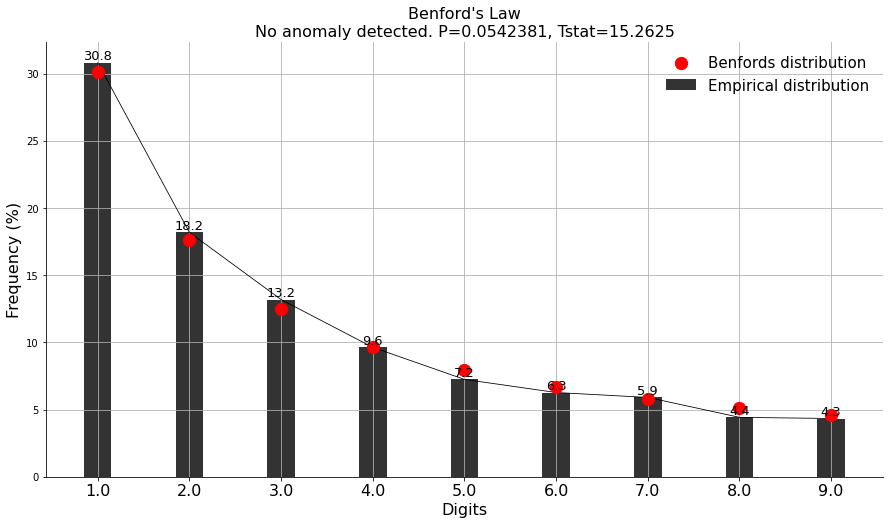

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':"Benford's Law\nNo anomaly detected. P=0.0542381, Tstat=15.2625"}, xlabel='Digits', ylabel='Frequency (%)'>)

In [5]:
# Conduct a Benford's Law Analysis
bl = benfordslaw(alpha=0.01)

# Extract election information.
X = data['Amount'].values

# Make fit
results = bl.fit(X)
bl.plot(title="Benford's Law")